In [3]:
%load_ext autoreload
%autoreload 2
viz_cortex = __import__('03_viz_cortex')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
corrs_thresh, coefs = viz_cortex.load_corrs_and_coefs()

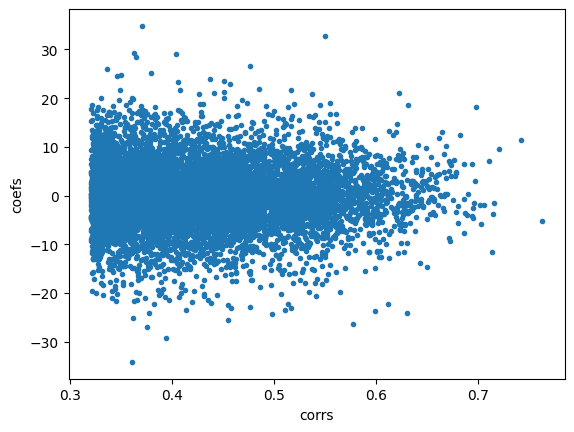

In [8]:
plt.plot(corrs_thresh, coefs, '.')
plt.xlabel('corrs')
plt.ylabel('coefs')
plt.show()